## 1. Data wrangling

This notebook contains the steps 1 and 2 to prepare the dataset for the modelling process:
1. Data collection 
2. Analysis and profiling
3. Quality check assesment
4. Data cleaning

The first step is importing the necessary packages

In [1]:
# Import the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

---
### 1.1. Data collection

This step involves gathering data from different sources and put together a single structure, usually a dataframe. In this case, the original dataset was already prepared by The US Energy Information Administration (EIA), and includes a meta-data file describing the variables' content.

The origin of the EIA dataset was a survey conducted in 2015 from a representative sample of the total US residential units. It comprises 5686 observations and 759 different attributes, which could be classified in higher level groups:

- Building attributes
- Building system features
- Household uses and habits
- Social and demographic characteristics
- Energy consumption features 
- Economic features
- Climate data

Not all features are relevant for this project. I will select and extract the response and explanatory variables that could be later fetched from the listing website. Finally, I will load the resulting dataset into a DataFrame object.  

In [2]:
# Import original dataset and load it into a dataframe

file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/raw/recs2015_public_v4.csv'

df = pd.read_csv(file, index_col=None)

In [3]:
df.shape

(5686, 759)

Here is an excerpt from the meta-data file with the selected variables and their meaning: 

| SAS Variable Name | Variable Description |
| -------- | --------- |
| ATTIC | Attic above the housing unit |
| BEDROOMS | Number of bedrooms |
| CDD65 | Cooling degree days in 2015, base temperature 65F |
| CELLAR | Housing unit over a basement |
| COOLTYPE | Type of air conditioning equipment used |
| DOLELCOL | Electricity cost for air conditioning (central systems and individual units), in dollars, 2015 |
| DOLLAREL | Total electricity cost, in dollars, 2015 |
| EQUIPAGE | Age of main space heating equipment |
| EQUIPM | Main space heating equipment type |
| HDD65 | Heating degree days in 2015, base temperature 65F |
| HIGHCEIL | High ceilings |
| CLIMATE_REGION_PUB | Building America Climate Zone |
| KOWNRENT | Own or rent |
| NCOMBATH | Number of full bathrooms |
| NHAFBATH | Number of half bathrooms |
| PROTHERM | Programmable main thermostat |
| SIZEOFGARAGE | Size of attached garage |
| STORIES | Number of stories in a single-family home |
| TOTALDOLSPH | Total cost for space heating, main and secondary, in dollars, 2015 |
| TOTALDOLWTH | Total cost for water heating, main and secondary, in dollars, 2015 | 
| TOTSQFT_EN | Total square footage (used for publication) |
| TYPEHUQ | Type of housing unit |
| YEARMADERANGE | Range when housing unit was built |

In [4]:
# Select and store relevant variables for the project in a list

main_feat = [
            'TYPEHUQ',
            'CLIMATE_REGION_PUB',
            'YEARMADERANGE',
            'HDD65',
            'CDD65',
            'TOTSQFT_EN',
            'COOLTYPE',
            'EQUIPAGE',
            'EQUIPM',
            'HIGHCEIL',
            'ATTIC',
            'CELLAR',
            'BEDROOMS',
            'NCOMBATH',
            'NHAFBATH',
            'PROTHERM',
            'SIZEOFGARAGE',
            'STORIES',
            'KOWNRENT',
            'DOLELCOL',
            'DOLLAREL',
            'TOTALDOLSPH', 
            'TOTALDOLWTH'
            ]

In [5]:
# Select the working dataframe based on selected variables for the project

df = df[main_feat]

In [6]:
# Check for number of rows and columns

df.shape

(5686, 23)

In [7]:
# Print sample

df.head()

,TYPEHUQ,CLIMATE_REGION_PUB,YEARMADERANGE,HDD65,CDD65,TOTSQFT_EN,COOLTYPE,EQUIPAGE,EQUIPM,HIGHCEIL,...,NCOMBATH,NHAFBATH,PROTHERM,SIZEOFGARAGE,STORIES,KOWNRENT,DOLELCOL,DOLLAREL,TOTALDOLSPH,TOTALDOLWTH
0,2,Hot-Dry/Mixed-Dry,7,2031,1768,1808,1,41,3,1,...,2,1,1,2,20,1,365.46,967.23,176.59,248.33
1,2,Hot-Humid,5,1915,2795,759,2,1,9,0,...,1,0,1,-2,10,1,249.54,1366.00,380.52,234.49
2,2,Mixed-Humid,4,2263,2235,2288,3,42,3,0,...,2,0,1,-2,10,1,844.63,2428.08,601.17,250.71
3,2,Mixed-Humid,2,3754,1374,2573,1,3,3,1,...,2,0,0,2,10,1,471.13,1313.12,863.46,114.62
4,2,Cold/Very Cold,4,5401,993,1024,1,3,3,0,...,2,0,0,1,20,1,62.05,581.07,67.87,220.26


---
### 1.2. Analysis and profiling

In this section, datatypes and statistics of different variables will be explored. Further, a general individual visualization of variables will be plotted to present a overview of their distribution. 

**Data types inspection**

In [8]:
# Inspect datatypes and missing data entries

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TYPEHUQ             5686 non-null   int64  
 1   CLIMATE_REGION_PUB  5686 non-null   object 
 2   YEARMADERANGE       5686 non-null   int64  
 3   HDD65               5686 non-null   int64  
 4   CDD65               5686 non-null   int64  
 5   TOTSQFT_EN          5686 non-null   int64  
 6   COOLTYPE            5686 non-null   int64  
 7   EQUIPAGE            5686 non-null   int64  
 8   EQUIPM              5686 non-null   int64  
 9   HIGHCEIL            5686 non-null   int64  
 10  ATTIC               5686 non-null   int64  
 11  CELLAR              5686 non-null   int64  
 12  BEDROOMS            5686 non-null   int64  
 13  NCOMBATH            5686 non-null   int64  
 14  NHAFBATH            5686 non-null   int64  
 15  PROTHERM            5686 non-null   int64  
 16  SIZEOF

According to the meta-data file, variables include categorical, continuous and discrete values, which do not match the datatypes in the working dataframe seen in the cell above. 

In [9]:
# Store uodated datatype information in a dictionary

dtypes_dict = { 
                'ATTIC':'category',
                'BEDROOMS':'int64',
                'CDD65':'float64',
                'CELLAR':'category',
                'COOLTYPE':'category',
                'DOLELCOL':'float64',
                'DOLLAREL':'float64',
                'EQUIPAGE':'category',
                'EQUIPM':'category',
                'HDD65':'float64',
                'HIGHCEIL':'category',
                'CLIMATE_REGION_PUB':'category',
                'KOWNRENT':'category',
                'NCOMBATH':'int64',
                'NHAFBATH':'int64',
                'PROTHERM':'category',
                'SIZEOFGARAGE':'category',
                'STORIES':'category',
                'TOTALDOLSPH':'float64',
                'TOTSQFT_EN':'float64',
                'TYPEHUQ':'category',
                'YEARMADERANGE':'category',
                'TOTALDOLWTH':'float64' 
              }

df = df.astype(dtypes_dict) # Apply correct variables' datatypes

---
**Variable optimization**

Many of categorical variables has intergers code entries corresponding to classification groups explained in the meta-data information. The codes will be replaced in the cell below by the actual meaning to improve readability in graphs and plots.

Also, some categorical variables will be grouped in broader classification to reduce the number of variables.

In [10]:
# Change category names in category variables for better readability

equipage = {1:'A: -2 yrs', 2:'B: 2-4 yrs', 3:'C: 5-9 yrs', 41:'D: 10-14 yrs', 42:'E: 15-19 yrs', 5:'F: +20 yrs', -2:'None'}
df['EQUIPAGE'].replace(equipage, inplace=True)

kownrent = {1:'Owned', 2:'Rented', 3:'Occupied'}
df['KOWNRENT'].replace(kownrent, inplace=True)

stories = {10:'1', 20:'2', 31:'3', 32:'+4', 40:'Split-level', -2:'NA'} 
df['STORIES'].replace(stories, inplace=True)

typehuq = {1:'Mobile home', 2:'Detached house', 3:'Attached house', 4:'Apartment in bld with 2-4 units', 5:'Apartment in bld with 5+ units'}
df['TYPEHUQ'].replace(typehuq, inplace=True)

yearmaderange = {1:'.<1950', 2:'1950-1959', 3:'1960-1969', 4:'1970-1979', 5:'1980-1989', 6:'1990-1999', 7:'2000-2009', 8:'2010-2015'}
df['YEARMADERANGE'].replace(yearmaderange, inplace=True)

In [11]:
# Reclassify categories in broader groups 

cooltype = {1:'Central', 2:'Individual', 3:'Both central and individual', -2:'None'}
df['COOLTYPE'].replace(cooltype, inplace=True)

equipm = {2:'Central water system', 3:'Central furnace', 4:'Central heat pump', 5:'Other individual', 6:'Other individual', 7:'Other individual', 8:'Other individual', 9:'Other individual', 10:'Other individual', 21:'Other individual', -2:'None'}
df['EQUIPM'].replace(equipm, inplace=True)

# Merge number of bathrooms and half-bathrooms in a single category
df['BATHROOMS'] = df['NCOMBATH'] + df['NHAFBATH']/2
df.drop(['NCOMBATH', 'NHAFBATH'], axis=1, inplace=True)

# Add a new variable for Total electric consumption excluding cooling, and drop the former
df['ELECT_COST'] = df['DOLLAREL'] - df['DOLELCOL']
df.drop(['DOLLAREL'], axis=1, inplace=True)

---
**Variable renaming**

Columns are renamed to represent their meaning more intuitively, therefore improve code readability

In [12]:
# Creates a dict with actual and new names.

rename = {'ATTIC':'ATTIC',
          'BEDROOMS':'BEDROOMS',
          'CDD65':'CDD65',
          'CELLAR':'BASEMENT',
          'COOLTYPE':'COOL_TYPE',
          'DOLELCOL':'COOL_COST',
          'EQUIPAGE':'EQUIP_AGE',
          'EQUIPM':'HEAT_TYPE',
          'HDD65':'HDD65',
          'HIGHCEIL':'HIGH_CEIL',
          'CLIMATE_REGION_PUB':'CLIMATE_REGION',
          'KOWNRENT':'OWNERSHIP',
          'NCOMBATH':'NCOMBATH',
          'NHAFBATH':'NHAFBATH',
          'PROTHERM':'THERMOSTAT',
          'SIZEOFGARAGE':'SIZEOFGARAGE',
          'STORIES':'STORIES',
          'TOTALDOLSPH':'HEAT_COST',
          'TOTSQFT_EN':'FLOOR_AREA',
          'TYPEHUQ':'UNIT_TYPE',
          'YEARMADERANGE':'DECADE_BUILT',
          'TOTALDOLWTH':'WATERHEAT_COST' 
            }

In [13]:
# Rename columns applying 'rename' dict

df.rename(rename, axis=1, inplace=True)

---
**Statistics inspection**

Statistics for numerical variables are inspected below to check for inconsistencies in the data, such as out-of-range values.

In [14]:
# Check summary statistics for numerical variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
HDD65,5686.0,3707.848751,2149.272713,0.00,1881.0000,3877.500,5467.0000,9843.00
CDD65,5686.0,1719.206120,1193.562960,0.00,793.0000,1378.000,2231.0000,6607.00
FLOOR_AREA,5686.0,2081.443546,1282.660286,221.00,1100.5000,1773.500,2766.0000,8501.00
BEDROOMS,5686.0,2.832923,1.106412,0.00,2.0000,3.000,3.0000,10.00
COOL_COST,5686.0,237.380515,277.863400,0.00,48.3650,146.605,328.2625,2860.01
HEAT_COST,5686.0,511.110366,482.333423,0.00,164.0200,400.845,695.2075,4766.66
WATERHEAT_COST,5686.0,296.659831,208.840347,0.00,156.6775,236.445,375.4900,2566.61
BATHROOMS,5686.0,1.905558,0.815988,0.00,1.0000,2.000,2.5000,6.50
ELECT_COST,5686.0,1166.398547,703.334011,15.43,670.0450,1021.745,1496.9200,7310.58


It seems that everiything lies within expected consistent values

---
**Visual inspection of variables**

Numerical variables are plotted below individually for further inspection. 

In [15]:
# Create a function to generate a PMF plot for categorical and discrete variables

def Pmf(series, Title):
    '''Generates a probability mass function (PMF) of a pandas series'''
    value = series.value_counts().sort_index()
    pmf = value*100 / len(series)
    plt.bar(value.index, pmf)
    plt.xticks(value.index)
    plt.ylabel('Frequency')
    plt.title(Title, fontsize='large', fontweight='bold')

In [16]:
# Set visual style for graphs

plt.style.use('seaborn')

Broad classification for residential units are shown below. Type, age and location (climate clasiffication) of the units are perhaps the most determinant factors for the target variable.

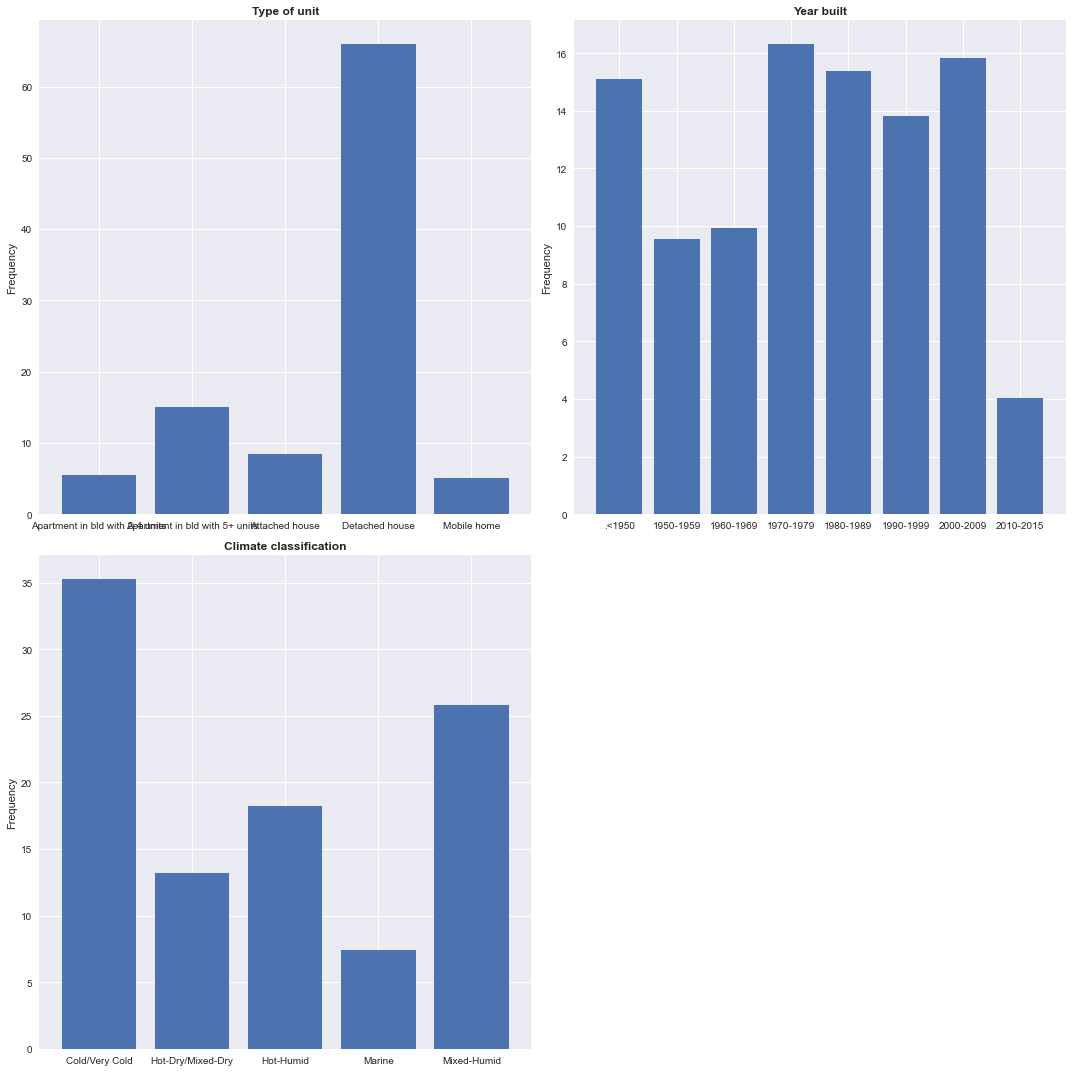

In [17]:
fig = plt.figure(figsize=(15,15), dpi=72)

# Plot type of housing unit
plt.subplot(2,2,1)
Pmf(df['UNIT_TYPE'], 'Type of unit')

# Plot year built
plt.subplot(2,2,2)
Pmf(df['DECADE_BUILT'], 'Year built')

# Plot climate classification
plt.subplot(2,2,3)
Pmf(df['CLIMATE_REGION'], 'Climate classification')

plt.tight_layout()
plt.show()

There are a few relevant characteristics that can be observed:
- Most of units are deattached houses (+65%)
- Age values are uniformly distributed except for decades 1950-1959 and 1960-1969 which present roughly half of entries that other decades
- Climate distribution for units' location seems consistent with climate areas proportion in the US mainland territory, dominated by climates Cold/Very Cold and Mixed-Humid.

Floor area represents other important explanatory factor for units' energy consumption, its distribution is shown below:

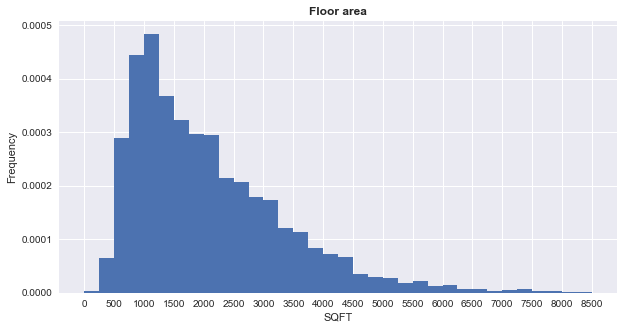

In [18]:
# Plot histogram for floor area measurements

sqf = df['FLOOR_AREA']

# Creates figure and plot 
fig = plt.figure(figsize=(10,5), dpi=72)
sqf.plot.hist(bins=34, range=[0,8500], density=True)

# Adjust graphic appearance
x_list = [i*500 for i in range(0,18)]
plt.xticks(x_list, x_list)
plt.xlabel('SQFT')
plt.title('Floor area', fontweight='bold')

plt.show()

Floor areas have a skewed distribution resembling a Poisson-like shape. Predominant floor areas concentrate around 1000-2000 sqft.

PMF plots for different **building system** features are shown in the cell below:

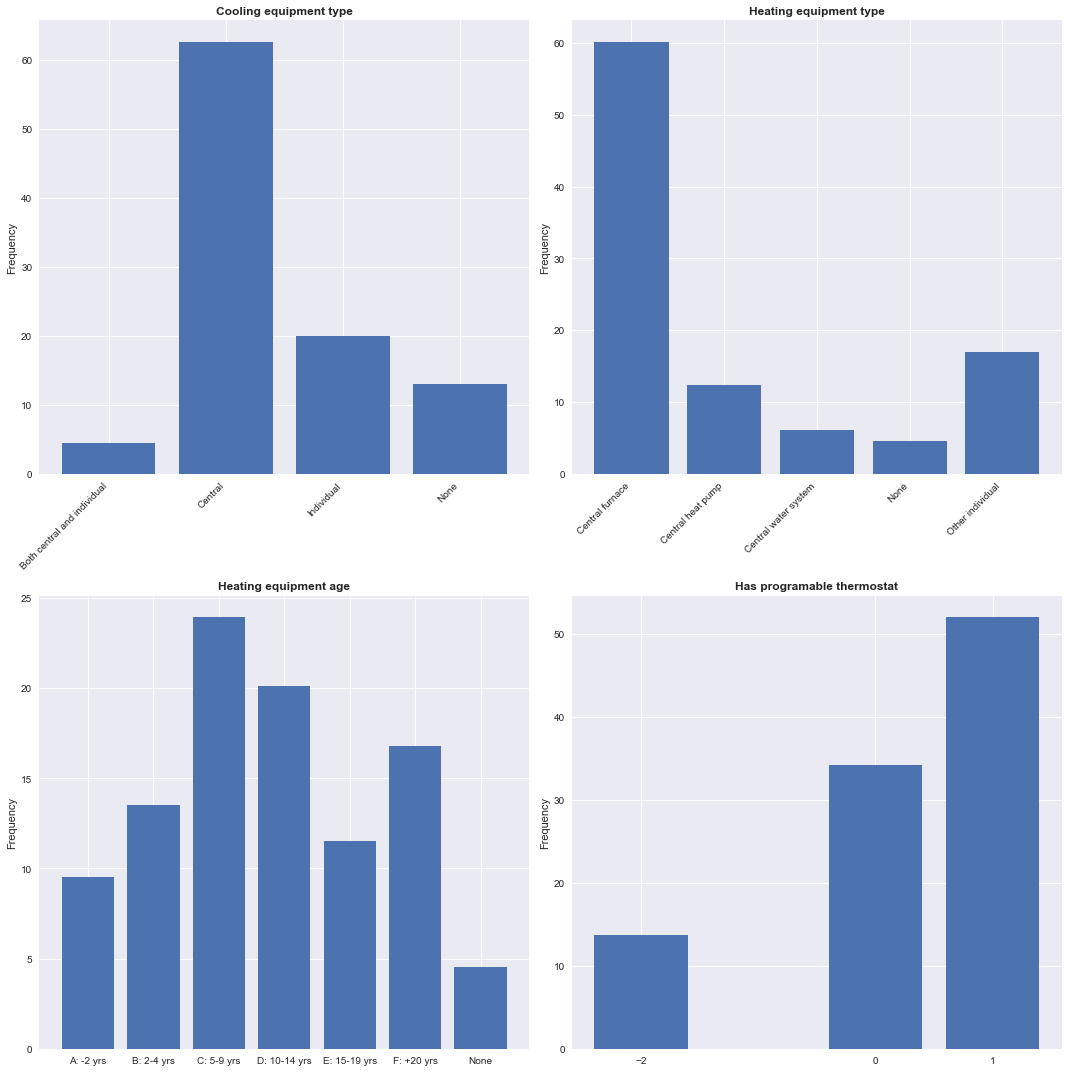

In [19]:
# Plot PMF of categorical variables

fig = plt.figure(figsize=(15,15), dpi=72)

plt.subplot(2,2,1)
Pmf(df['COOL_TYPE'], 'Cooling equipment type')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(2,2,2)
Pmf(df['HEAT_TYPE'], 'Heating equipment type')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(2,2,3)
Pmf(df['EQUIP_AGE'], 'Heating equipment age')

plt.subplot(2,2,4)
Pmf(df['THERMOSTAT'], 'Has programable thermostat')

plt.tight_layout()
plt.show()

It can be observed that:
- An overwhelming mayority of units use central conditioning systems alone or in combination with other type
- Roughly half of units have a programable thermostat
- Heating equipments age are roughly evenly distributed with a peak between 5-15 years
- Roughly 17% of heating equiments have more than 20 years of age

In the next three cells, it can be seen the distribution of other variables accounting for **unit's general features**

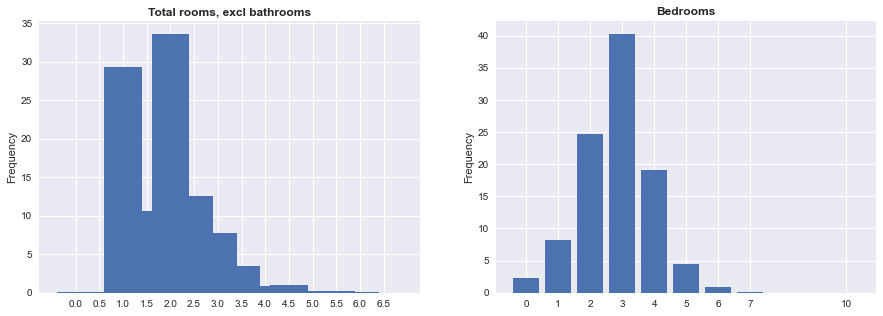

In [20]:
# Plot PMF of discrete variables

fig = plt.figure(figsize=(15,5), dpi=72)

plt.subplot(1,2,1)
Pmf(df['BATHROOMS'], 'Total rooms, excl bathrooms')

plt.subplot(1,2,2)
Pmf(df['BEDROOMS'], 'Bedrooms')

plt.show()

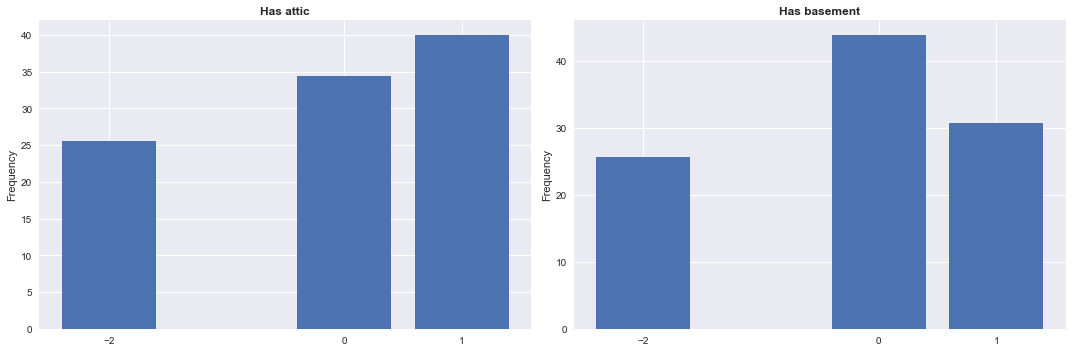

In [21]:
# Plot PMF of categorical variables

fig = plt.figure(figsize=(15,5), dpi=72)

plt.subplot(1,2,1)
Pmf(df['ATTIC'], 'Has attic')

plt.subplot(1,2,2)
Pmf(df['BASEMENT'], 'Has basement')

plt.tight_layout()
plt.show()

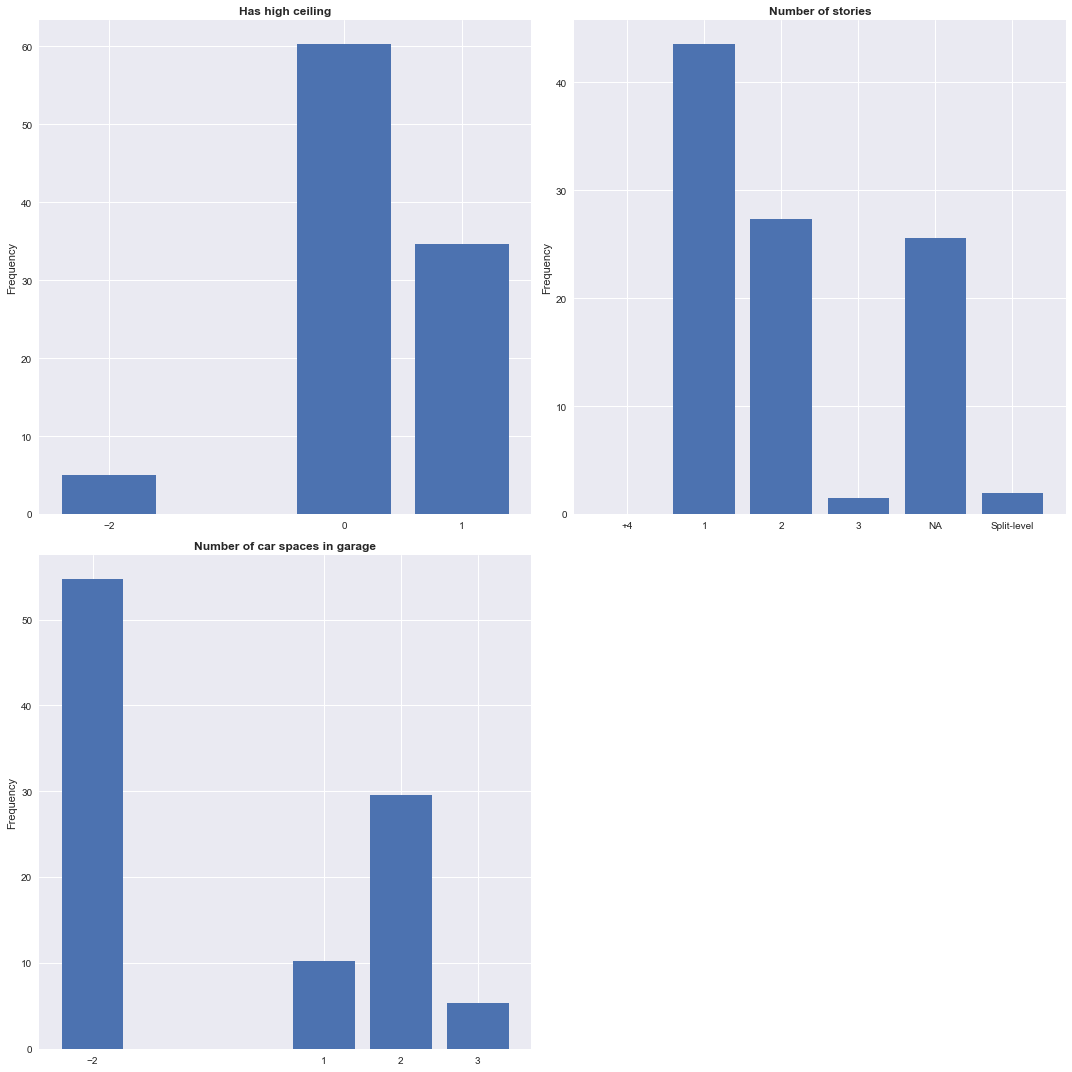

In [22]:
# Plot PMF of categorical and numerical variables

fig = plt.figure(figsize=(15,15), dpi=72)

plt.subplot(2,2,1)
Pmf(df['HIGH_CEIL'], 'Has high ceiling')

plt.subplot(2,2,2)
Pmf(df['STORIES'], 'Number of stories')

plt.subplot(2,2,3)
Pmf(df['SIZEOFGARAGE'], 'Number of car spaces in garage')

plt.tight_layout()
plt.show()

**Social and demographic** related variables are depicted in the cell below

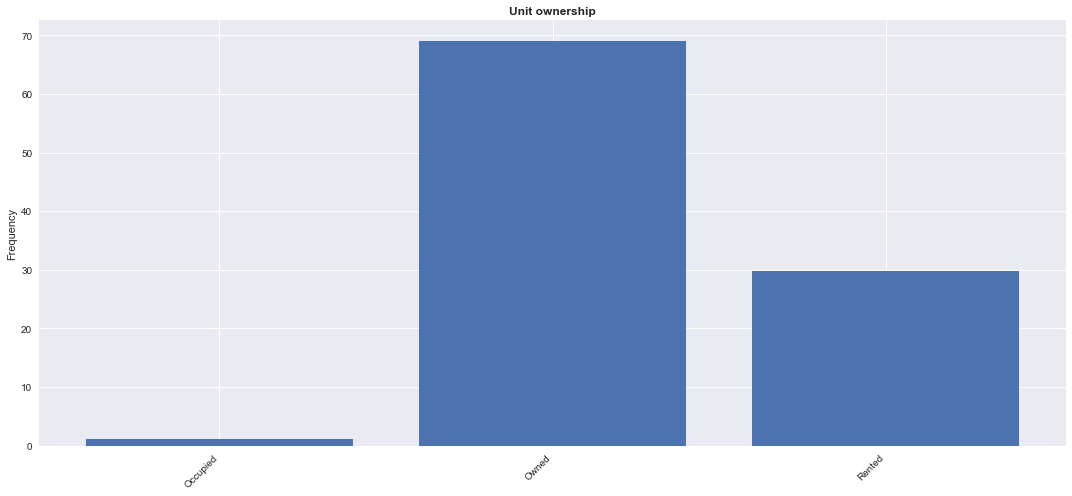

In [23]:
# Plot PMF of categorical variables

fig = plt.figure(figsize=(15,7), dpi=72)

Pmf(df['OWNERSHIP'], 'Unit ownership')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

Lastly, histograms of the target variables are shown below, they all represent dollar costs for different energy uses in the units:

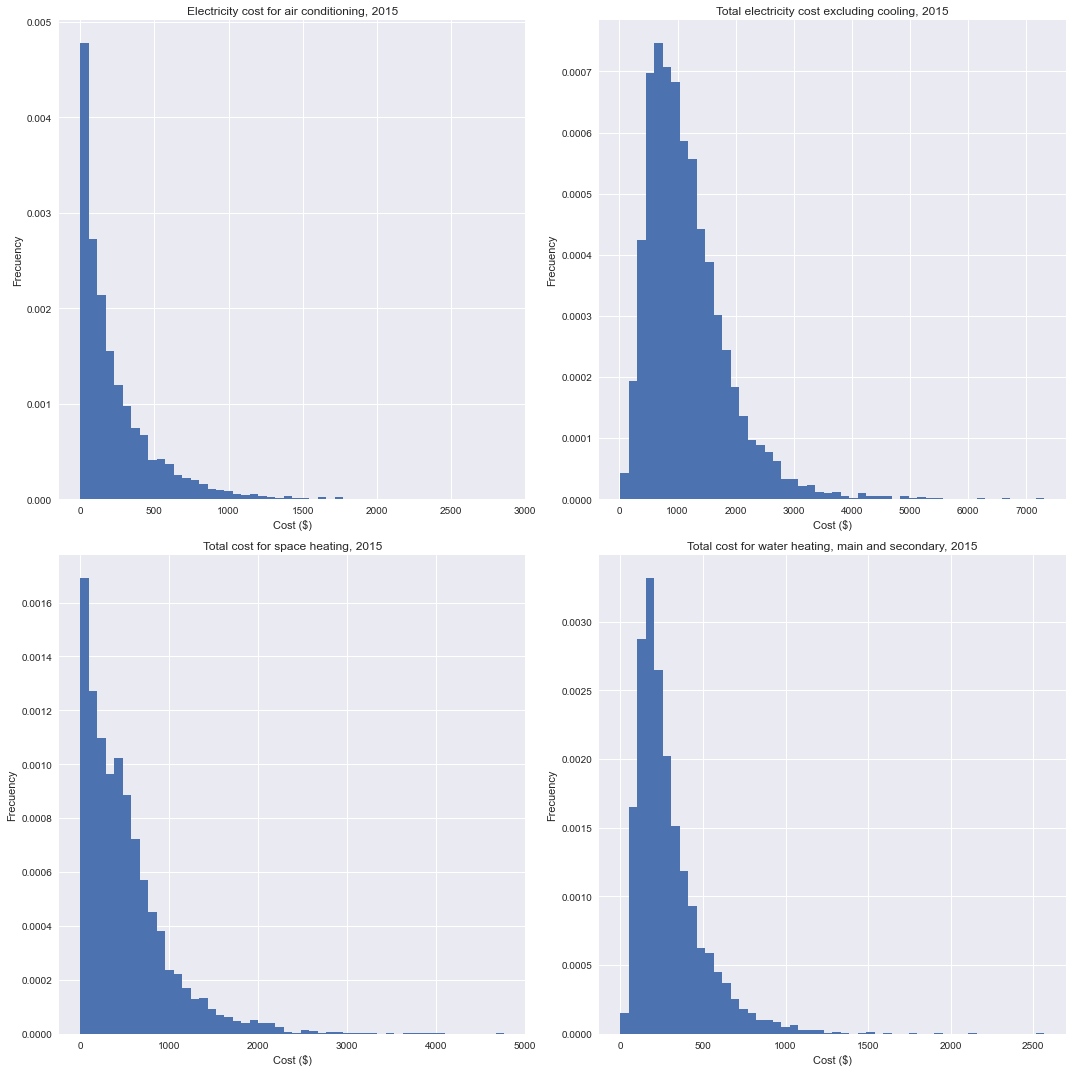

In [24]:
# Plot histograms of utility dollar spending

fig = plt.figure(figsize=(15,15), dpi=72)

plt.subplot(2,2,1)
plt.hist(df['COOL_COST'], bins=50, density=True)
plt.title('Electricity cost for air conditioning, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.subplot(2,2,2)
plt.hist(df['ELECT_COST'], bins=50, density=True)
plt.title('Total electricity cost excluding cooling, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.subplot(2,2,3)
plt.hist(df['HEAT_COST'], bins=50, density=True)
plt.title('Total cost for space heating, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.subplot(2,2,4)
plt.hist(df['WATERHEAT_COST'], bins=50, density=True)
plt.title('Total cost for water heating, main and secondary, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.tight_layout()
plt.show()

All variables' ditributions are left skewed with long tails to the right. They resemble to poisson or exponential shape distributions. 

As seen above, many variables have "-2" values meaning "non-applicable", which are replaced below for np.NaN values for better inspection and handling in the next notebook

In [25]:
# Replace -2 (non applicable) values in numeric variables

df.replace(-2, np.nan, inplace=True)

The resulting dataframe is loaded in a csv file for further missigness analysis and data transformation in a different notebook. 

In [26]:
# Writing df dataframe to csv

path = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/interim/pre-selected.csv'

df.to_csv(path)